In [32]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import cv2

In [33]:
# Plot

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']

# The image we are going to examine :-

![](images/test3.jpeg)

In [34]:
# Reading image and converting to grayscale

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


# Getting the hex code for RGB values

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


# Applyling the K-means clustering algorithm to cluster 10 different colors

image = get_image('images/test3.jpeg')
number_of_colors = 10 # Hyperparameter
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [35]:
counts = Counter(labels)
center_colors = clf.cluster_centers_


# We get ordered colors by iterating through the keys

ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

([<matplotlib.patches.Wedge at 0x7fd3a9f35850>,
 [Text(1.0078856380787249, 0.44064332578020715, '#313251'),
  Text(0.3487538318330836, 1.0432500969478706, '#586b89'),
  Text(-0.36213934722894925, 1.0386794949302651, '#899ebd'),
  Text(-0.827564364533249, 0.7246635236816326, '#db8d94'),
  Text(-1.081816930724471, 0.19917863439105438, '#663d54'),
  Text(-0.958105002414244, -0.5404024466532342, '#805e75'),
  Text(-0.4228603555964014, -1.0154748247321965, '#434f6d'),
  Text(-0.0010888041055625596, -1.0999994611387862, '#fb9e82'),
  Text(0.4514563381759663, -1.0030888169652514, '#a5798f'),
  Text(0.9916109295469889, -0.47613838786948975, '#6e84a3')])

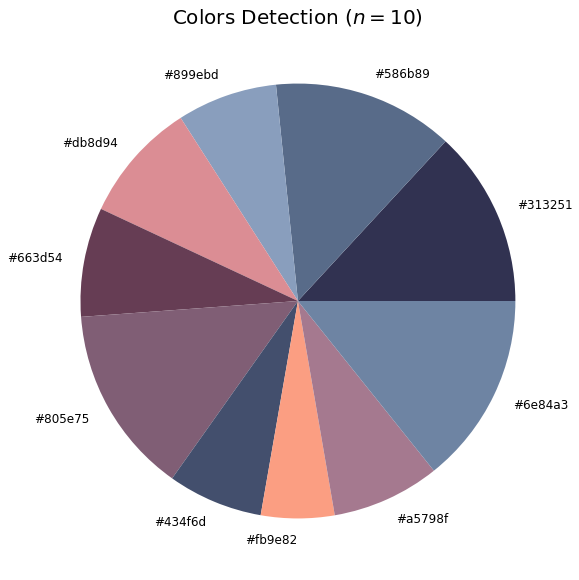

In [36]:
plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [37]:
# Converting RGB into integers

for i in range(len(rgb_colors)):
    rgb_colors[i] = rgb_colors[i].astype(int)

In [38]:
# Dividing image into small squares for computation

def square_maker():
    inp_img = image
    h = int(inp_img.shape[0])
    step_h = int(h/10) 
    w = int(inp_img.shape[1])
    step_w = int(w/10) 
    X = np.arange(0,h+step_h,step_h)
    Y =np.arange(0,w+step_w,step_w)
    squares = [inp_img[0:step_h,0:step_w]]
    for i in range(0,len(X)-1):
        for j in range(0,len(Y)-1):
            squares.append(inp_img[X[i]:X[i+1],Y[j]:Y[j+1]])
    return np.array(squares)[1::]

In [39]:
def color_computing(array):
    DIFF = []
    squared_image = square_maker()
    for square in squared_image:
        DIFF_COLOR = []
        for color in range(len(rgb_colors)):
            diff = np.abs(square - rgb_colors[color])
            DIFF_COLOR.append(diff.mean())
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)

In [40]:
# Best/most dominant color for each square

def best_color_plot(selected_slice):
    plt.subplot(1,2,1)
    plt.title('Retrieved Color')
    plt.imshow((np.zeros((16,16,3))+ rgb_colors[color_computing(image)[selected_slice].argmin()]).astype(int))
    plt.subplot(1,2,2)
    plt.title('Selected Square: '+ str(selected_slice))
    plt.imshow(square_maker()[selected_slice])

/tmp/ipykernel_192238/4264174426.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(squares)[1::]


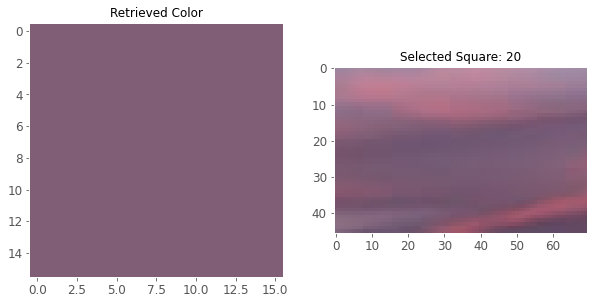

In [41]:
best_color_plot(20)

In [42]:
# Summary

def summary():
    results = color_computing(image)
    cols = ['Square Number'] + hex_colors
    sorted_results = pd.DataFrame(columns= cols)
    k=0

    for r in results:
        d = {'Square Number':int(k)}
        for c in range(len(hex_colors)):
            d[hex_colors[c]] = r[c]*100/r.sum()
        sorted_results = sorted_results.append(d,ignore_index=True)
        k=k+1
    sorted_results['Square Number'] = sorted_results['Square Number'].astype(int)
    return sorted_results

In [43]:
summary()

/tmp/ipykernel_192238/4264174426.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(squares)[1::]


,Square Number,#313251,#586b89,#899ebd,#db8d94,#663d54,#805e75,#434f6d,#fb9e82,#a5798f,#6e84a3
0,0,20.325400,8.242580,6.399890,7.304127,14.999420,7.791054,14.363482,12.446978,3.425745,4.701324
1,1,18.492914,7.290149,10.959069,8.932238,12.892077,5.201634,12.223320,12.230693,2.912337,8.865570
2,2,15.271382,6.229552,12.387443,13.996430,9.292896,1.693396,8.579047,16.786260,6.947614,8.815980
3,3,13.839860,4.219750,13.614755,15.794341,7.791251,3.070666,7.066517,19.110726,8.706255,6.785879
4,4,13.503452,4.236490,12.743146,15.231382,8.186403,4.899411,7.072381,19.084233,8.792321,6.250781
...,...,...,...,...,...,...,...,...,...,...,...
105,105,17.227538,6.733622,5.115989,10.807609,13.162465,8.912511,11.944208,14.461517,7.806390,3.828150
106,106,17.690117,7.333378,4.140514,10.345551,13.519115,9.112879,12.550487,13.823158,7.750982,3.733819
107,107,16.743186,6.183247,5.691296,11.226183,13.002542,9.012991,11.356354,15.173517,7.971626,3.639058
108,108,16.374566,5.684325,6.445175,11.702377,12.641500,8.810171,10.802802,15.796551,8.218770,3.523764
